In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import os

## Data preparation

### Image resizing and renaming using PIL

In [17]:
passport_images_dir = r"C:\Users\jose\Documents\datasets\passport and ID cards\passports"
processed_passport_images_dir = r"C:\Users\jose\Desktop\PassportAssessment\KenyaIDImages\processed_passports"

pasport_images = os.listdir(passport_images_dir) 

for i in range(len(passport_images)):
    passport_image = Image.open(os.path.join(passport_images_dir, passport_images[1]))
    passport_image.resize((164, 124))
    passport_image.save(os.path.join(processed_passport_images_dir, "passport_"+ str(i) +".png"))

print("Operation 100% completed")

Operation 100% completed


In [19]:
card_images_dir = r"C:\Users\jose\Documents\datasets\passport and ID cards\cards"
processed_card_images_dir = r"C:\Users\jose\Desktop\PassportAssessment\KenyaIDImages\processed_cards"

card_images = os.listdir(card_images_dir) 

for i in range(len(card_images)):
    passport_image = Image.open(os.path.join(card_images_dir, card_images[1]))
    passport_image.resize((164, 124))
    passport_image.save(os.path.join(processed_card_images_dir, "card_" +str(i)+ ".png"))
    
print("Operation 100% completed")

Operation 100% completed


## Data Augmentation using keras: ImageDataGenerator 

In [89]:
images_dir = r"C:\Users\jose\Documents\datasets\passports_id_cards\train"
test_dir = r"C:\Users\jose\Documents\datasets\passports_id_cards\test"

## Directory structure

1. <b>Train</b> <br>
    1.1 Card<br>
    1.2 Passport<br>
2. <b>Test</b>

In [22]:
# Data generator cofiguration

datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    fill_mode='wrap',
    horizontal_flip=True, 
    vertical_flip=True, 
    rescale= 1/225,
    validation_split=0.1
)


In [23]:
train_data = datagen.flow_from_directory(
    images_dir,
    target_size=(124, 124),
    class_mode='binary',
    batch_size=32,
    subset="training",    
)

validation_data = datagen.flow_from_directory(
    images_dir,
    target_size=(124, 124),
    class_mode='binary',
    batch_size=32,
    subset="validation",
)

Found 450 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## Creating a Sequential API model for classification

In [52]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(124, 124, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(2))
model.add(layers.Activation('softmax'))



In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 122, 122, 32)      896       
_________________________________________________________________
activation_15 (Activation)   (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 59, 59, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 64)       

In [54]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Callbacks: Handling with overfitting

In [56]:
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc_callback = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

## Fitting the model

In [57]:
history = model.fit(
    train_data, 
    batch_size=32, 
    epochs=20, 
    validation_data=validation_data, 
    verbose=2, 
    callbacks=[es_callback, mc_callback]
)

Epoch 1/20
15/15 - 9s - loss: 1.0660 - accuracy: 0.5622 - val_loss: 0.4577 - val_accuracy: 0.9600
Epoch 2/20
15/15 - 9s - loss: 0.5763 - accuracy: 0.7067 - val_loss: 0.3980 - val_accuracy: 0.9000
Epoch 3/20
15/15 - 9s - loss: 0.4025 - accuracy: 0.8289 - val_loss: 3.7598 - val_accuracy: 0.5000
Epoch 4/20
15/15 - 9s - loss: 0.6038 - accuracy: 0.8822 - val_loss: 0.1632 - val_accuracy: 1.0000
Epoch 5/20
15/15 - 10s - loss: 0.2824 - accuracy: 0.9356 - val_loss: 0.1138 - val_accuracy: 1.0000
Epoch 6/20
15/15 - 9s - loss: 0.2895 - accuracy: 0.9267 - val_loss: 0.1704 - val_accuracy: 0.9400
Epoch 7/20
15/15 - 9s - loss: 0.2962 - accuracy: 0.9289 - val_loss: 0.1216 - val_accuracy: 1.0000
Epoch 8/20
15/15 - 9s - loss: 0.2653 - accuracy: 0.9400 - val_loss: 0.1114 - val_accuracy: 0.9800
Epoch 9/20
15/15 - 9s - loss: 0.1897 - accuracy: 0.9689 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 10/20
15/15 - 9s - loss: 0.2954 - accuracy: 0.9422 - val_loss: 0.3441 - val_accuracy: 0.8400
Epoch 11/20
15/15 

## Model evaluation

In [58]:
score = model.evaluate(validation_data, verbose=0) 
score[1]

1.0

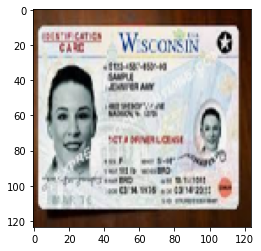

card


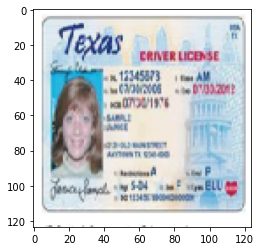

card


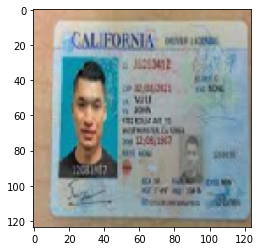

card


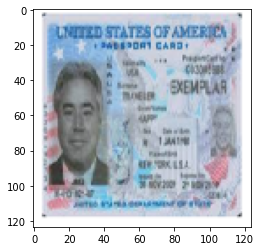

card


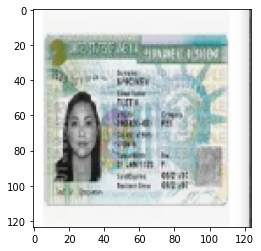

card


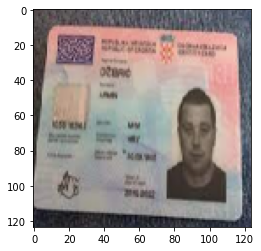

card


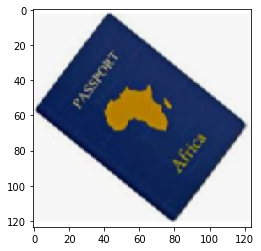

passport


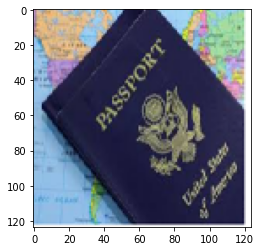

passport


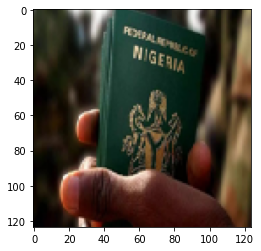

passport


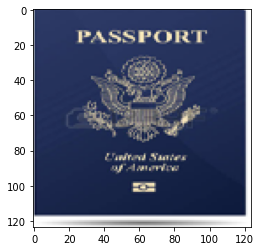

passport


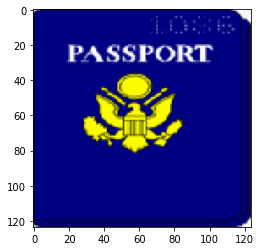

passport


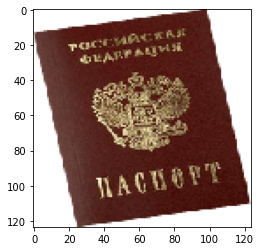

passport


In [91]:
test_images = os.listdir(test_dir)
class_names = ['card' ,'passport']

for i in range(len(test_images)):
    test_image = image.load_img(
        os.path.join(test_dir, test_images[i]), 
        color_mode="rgb", target_size=(124,124)
    )    
    array_image = image.img_to_array(test_image)
    array_image = np.expand_dims(test_image, axis=0)
    prediction = model.predict(array_image)
    plt.imshow(test_image)
    plt.show()
    print(class_names[np.argmax(prediction)])